# Graph Analysis
### Depth-first search
**Depth-first search** (DFS) is one of the fundamental *graph traversal* algorithms. A DFS explores one path deep as far as possible, and then it backtracks if it hits a dead end. In this case, it continues exploring other unvisited paths.
We can implement DFS in two versions:
- **Recursive DFS:** We use a **recursive** function.
- **Iterative DFS:** We use a **stack** to hold unvisited neighbors.

<hr>

Some key points about DFS:
- **Time complexity:** If we use an adjacenc list for a graph $G=(V,E)$, we need to explore each node and each edge. Thus, the time complexity is $O(|V|+|E|)$.
- **Space complexity:** The space complexity for graph $G=(V,E)$ is $O(|V|)$.
- **Completeness:** If the graph is finite, completeness is guaranteed for a DFS with **cycle detection**.

**Reminder:** **Completeness** in search algorithms refers to whether the algorithm is guaranteed to find a solution if one exists.

<hr>

In the following, we review the DFS in two versions: **recursive** and **iterative**. Then, we use DFS for finding a path from a start node to a target node. Also, we extend the code to find all paths from a start node to a target node. Finally, we use **NetworkX** to display the graph used in the examples.
<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required module to display graphs
import networkx as nx

In [2]:
# Define the DFS in recursive mode
def dfs_recursive(graph, node, visited=None):
    '''graph: an adjacency list '''
    '''node: start node to begin search from'''
    if visited is None:
        visited = set()

    # Mark current node as visited
    visited.add(node)
    print(node,end=', ')  # Process the node

    # Visit all unvisited neighbors
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)

In [3]:
# Example graph (adjacency list)

#     A
#    / \
#   B   C
#  /   / \
# D --E --F

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E', 'F'],
    'D': ['B','E'],
    'E': ['C','D'],
    'F': ['C']
}

start='A'
print(f"DFS (recursive) traversal starting from {start}:")
dfs_recursive(graph, start)

DFS (recursive) traversal starting from A:
A, B, D, E, C, F, 

In [4]:
# Define DFS in iterative mode
def dfs_iterative(graph, start):
    '''graph: an adjacency list '''
    '''start: is the start node to search from'''
    visited = set()
    stack = [start]
    
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            print(node,end=', ')  # Process the node
            
            # Add unvisited neighbors to stack
            # in reverse order to match recursive order
            for neighbor in reversed(graph[node]):  
                if neighbor not in visited:
                    stack.append(neighbor)
    
    return 

# Example
start='A'
print(f"DFS (iterative) traversal starting from {start}:")
dfs_iterative(graph, start)

DFS (iterative) traversal starting from A:
A, B, D, E, C, F, 

<hr style="height:3px;background-color:lightgreen">

### Some applications of DFS
- Find a path from `start` to `target`
- Find all paths from `start` to `target`

In [7]:
# Find a path from start node to target node in a graph
def find_path_dfs(graph, start, target):
    # Stack stores (current_node, path_to_current)
    stack = [(start, [start])]
    visited = set() # Empty set
    
    while stack:
        current_node, path = stack.pop()
        if current_node == target:
            return path
        
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
    
    return None  # No path exists

#Example
# Find a path from start to target
start,target='A','E'
path=find_path_dfs(graph,start,target)
print(f'Find the path from {start} to {end}')
print(f'The path is: {path}')

Find the path from A to E
The path is: ['A', 'C', 'E']


In [8]:
# Find all paths from start to target
def find_all_paths(graph, start, target):
    """
    Find all simple paths from start to target using iterative DFS with stack.
    
    Args:
        graph: dict or defaultdict, adjacency list representation
        start: starting node
        target: destination node
    
    Returns:
        List of all paths (each path is a list of nodes)
    """
    # Stack stores (current_node, path_to_current)
    stack = [(start, [start])]
    all_paths = []

    while stack:
        current_node, path = stack.pop()

        # If we reached the target, save the path
        if current_node == target:
            all_paths.append(path)
        else:
            # Explore neighbors
            for neighbor in graph[current_node]:
                if neighbor not in path:  # Avoid cycles (simple path only)
                    stack.append((neighbor, path + [neighbor]))
    
    return all_paths

In [9]:
# Example
# Find all paths from start to target
start,target='A','E'
paths=find_all_paths(graph,start, target)
print(f'Find all paths from {start} to {target}')
for i,path in enumerate(paths):
    print(f'The path_{i+1} is: {path}')

Find all paths from A to E
The path_1 is: ['A', 'C', 'E']
The path_2 is: ['A', 'B', 'D', 'E']


<hr style="height:3px; background-color:lightblue">

We display the graph used in the examples above by **NetworkX**.

In [10]:
# Extra, a function to convert your graph to Networkx style,
# introduced in an earlier post
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

The original graph


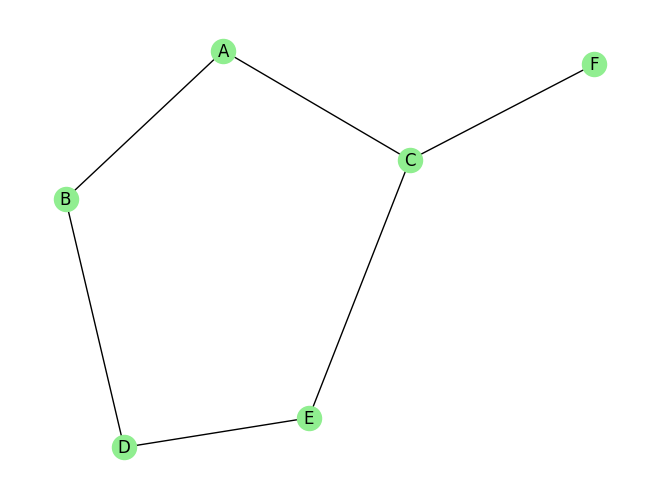

In [11]:
# convert graph into NetworkX style and display it
G_nx=convert_to_networkx(graph)
print('The original graph')
nx.draw(G_nx,with_labels=True,node_color='lightgreen')